我們下面就開始進入 SGD + Classifier 的實戰，


In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings('ignore')

X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87) 


#classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=20, early_stopping=True)
classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=20)
classifier.fit(X_train, y_train)

print('Training accuracy: ', classifier.score(X_train, y_train))
print('Testing accuracy: ', classifier.score(X_test, y_test))



Training accuracy:  0.8833333333333333
Testing accuracy:  0.8666666666666667


# Loss function

scikit learn 提供了 hinge ， modified_huber 與 log 三個 loss function 可以選用。

## Hinge Loss

hinge loss 是一個損失函數 （loss function） ， hinge loss 專用於 2 分類問題。

$$
l(y) = \max(0, 1 - y \cdot \hat{y})
$$

# penalty

scikit learn 提供了 l1 ， l2 與 elasticnet 三個選項可以使用。


我們下面來看看不同 iterration 模型的效果如何。


c:\Users\tobywang\Anaconda3\envs\toby\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\tobywang\Anaconda3\envs\toby\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\tobywang\Anaconda3\envs\toby\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\tobywang\Anaconda3\envs\toby\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users

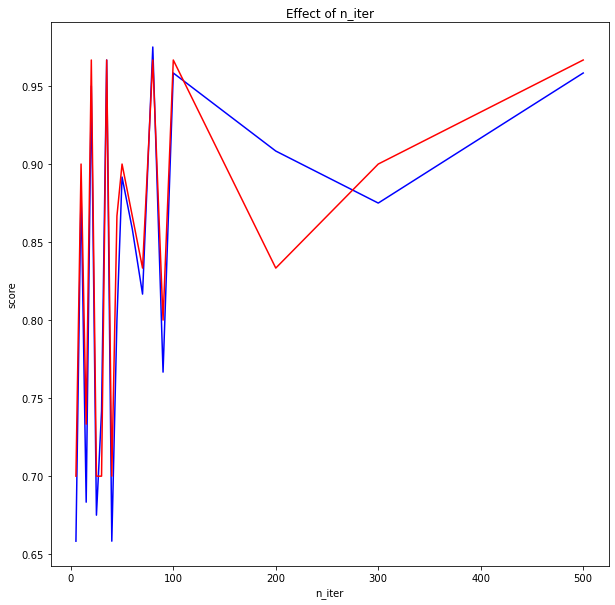

In [18]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 10]

n_iters = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 200, 300, 500]
scores_train = []
scores_test = []
for n_iter in n_iters:
    model = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    model.fit(X_train, y_train)
    scores_train.append(model.score(X_train, y_train))
    scores_test.append(model.score(X_test, y_test))

plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores_train, 'b', n_iters, scores_test, 'r')



如果給他提早停止效果會好嗎?

c:\Users\tobywang\Anaconda3\envs\toby\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\tobywang\Anaconda3\envs\toby\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


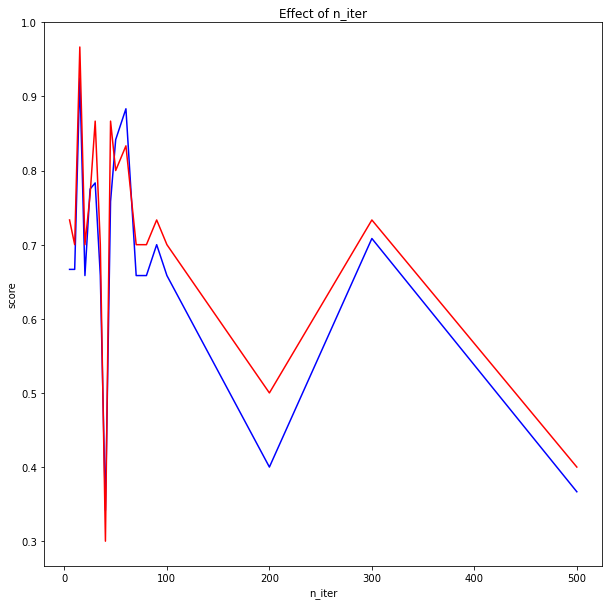

In [19]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 10]

n_iters = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 200, 300, 500]
scores_train = []
scores_test = []
for n_iter in n_iters:
    model = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter, early_stopping=True)
    model.fit(X_train, y_train)
    scores_train.append(model.score(X_train, y_train))
    scores_test.append(model.score(X_test, y_test))

plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores_train, 'b', n_iters, scores_test, 'r')


# Regressor

下面進入 回歸 的實戰。

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

X, y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# tol: The stopping criterion 停止的標準
regression = SGDRegressor(max_iter=100, tol=1e-3)
#regression = SGDRegressor(max_iter=10, tol=1e-3, early_stopping=True)
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


Mean squared error: 4804.61


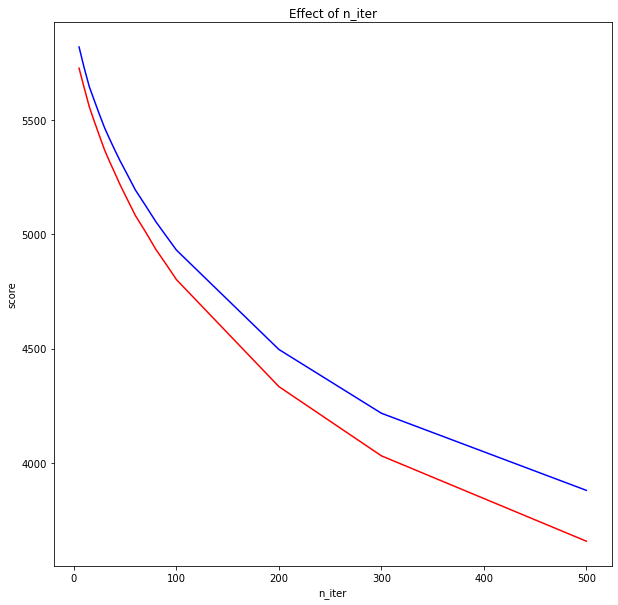

In [3]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 10]

n_iters = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 200, 300, 500]
scores_train = []
scores_test = []

for n_iter in n_iters:
    model = SGDRegressor(tol=1e-3, penalty="l2", max_iter=n_iter)
    model.fit(X_train, y_train)
    
    scores_train.append(mean_squared_error(y_train, model.predict(X_train)))
    scores_test.append(mean_squared_error(y_test, model.predict(X_test)))

plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores_train, 'b', n_iters, scores_test, 'r')



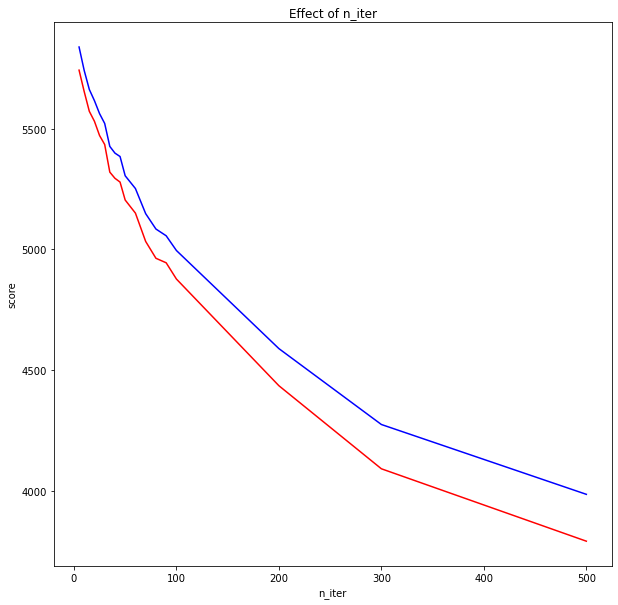

In [5]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 10]

n_iters = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 200, 300, 500]
scores_train = []
scores_test = []

for n_iter in n_iters:
    model = SGDRegressor(tol=1e-3, penalty="l2", max_iter=n_iter, early_stopping=True)
    model.fit(X_train, y_train)
    
    scores_train.append(mean_squared_error(y_train, model.predict(X_train)))
    scores_test.append(mean_squared_error(y_test, model.predict(X_test)))

plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores_train, 'b', n_iters, scores_test, 'r')
